In [1]:
#Description

#Airline: The name of the airline.

#Date_of_Journey: The date of the journey

#Source: The source from which the service begins.

#Destination: The destination where the service ends.

#Route: The route taken by the flight to reach the destination.

#Dep_Time: The time when the journey starts from the source.

#Arrival_Time: Time of arrival at the destination.

#Duration: Total duration of the flight.

#Total_Stops: Total stops between the source and destination.

#Additional_Info: Additional information about the flight

#Price: The price of the ticket   ----- X-Value to predict.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [60]:
#EDA Process
df.keys()

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [61]:
df.shape

(10683, 11)

In [62]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [63]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [64]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

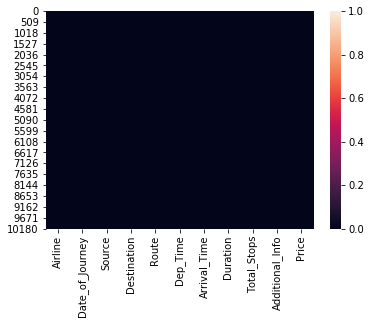

In [65]:
#To visuvalize the dataset
sns.heatmap(df.isnull())
plt.show()

In [66]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [67]:
#Unique Value of All Columns 
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [68]:
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [69]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [70]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [71]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [72]:
df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [73]:
df['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [74]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [75]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [76]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [77]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [78]:
#Date_of_Journey,(Deapreture time and Arrival Time (replaced by Duration)) ,
#Additional info Maximum values has no information so am deleting these columns
df.drop('Date_of_Journey',axis=1,inplace=True)
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)
df.drop('Additional_Info',axis=1,inplace=True)

df


,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,4107
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,4145
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,7229
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,12648


In [79]:
for column in ['Route', 'Total_Stops']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [80]:
df.isnull().sum()

Airline        0
Source         0
Destination    0
Route          0
Duration       0
Total_Stops    0
Price          0
dtype: int64

In [81]:
df.dtypes

Airline        object
Source         object
Destination    object
Route          object
Duration       object
Total_Stops    object
Price           int64
dtype: object

In [82]:
# the columns into Numeric Format usig label encoder
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

      


In [83]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==5):
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])

In [85]:
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==6):
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])
        
#For all those columns who has 12 attributes
from sklearn import preprocessing
for cols in df.columns:
    if(len(df[cols].value_counts()) ==12):
        le_anima = preprocessing.LabelEncoder()
        df[cols] = le_anima.fit_transform(df[cols])

In [86]:
#convert the Route and duration  column into Numeric
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [87]:
array = df['Route']

array.shapearray = df['Route']

array.shape

(10683,)

In [88]:
le=LabelEncoder()
data1=le.fit_transform(df['Route'])
data1

array([ 18,  84, 118, ...,  18,  18, 108])

In [89]:
df['Route']=data1

In [90]:
array1 = df['Duration']

array1.shapearray = df['Duration']

array1.shape

(10683,)

In [91]:
le=LabelEncoder()
data=le.fit_transform(df['Duration'])
data

array([240, 336, 106, ..., 280, 238, 347])

In [92]:
df['Duration']=data

In [93]:
df.dtypes

Airline        int32
Source         int32
Destination    int64
Route          int32
Duration       int32
Total_Stops    int32
Price          int64
dtype: object

In [95]:
df1 = pd.DataFrame(data=df)
df1

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,3,0,5,18,240,4,3897
1,1,3,0,84,336,1,7662
2,4,2,1,118,106,1,13882
3,3,3,0,91,311,0,6218
4,3,0,5,29,303,0,13302
...,...,...,...,...,...,...,...
10678,0,3,0,64,236,4,4107
10679,1,3,0,64,237,4,4145
10680,4,0,2,18,280,4,7229
10681,10,0,5,18,238,4,12648


In [96]:
df.describe()  #staticts representation of the dataset

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,194.069269,1.458111,9087.064121
std,2.352155,1.177221,1.474782,36.728405,108.620556,1.806290,4611.359167
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,48.000000,106.000000,0.000000,5277.000000
50%,4.000000,2.000000,1.000000,73.000000,233.000000,0.000000,8372.000000
75%,4.000000,3.000000,2.000000,104.000000,280.000000,4.000000,12373.000000
max,11.000000,4.000000,5.000000,127.000000,367.000000,4.000000,79512.000000


In [97]:
#finding the co-relation
dfcor=df.corr()
dfcor

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
Airline,1.000000,-0.013401,0.018479,0.025118,0.027917,0.036064,-0.039520
Source,-0.013401,1.000000,-0.592574,0.403403,-0.192009,-0.225601,0.015998
Destination,0.018479,-0.592574,1.000000,-0.461183,0.022037,0.337883,-0.071112
Route,0.025118,0.403403,-0.461183,1.000000,-0.062097,-0.437783,0.164118
Duration,0.027917,-0.192009,0.022037,-0.062097,1.000000,0.175207,-0.144270
Total_Stops,0.036064,-0.225601,0.337883,-0.437783,0.175207,1.000000,-0.571174
Price,-0.039520,0.015998,-0.071112,0.164118,-0.144270,-0.571174,1.000000


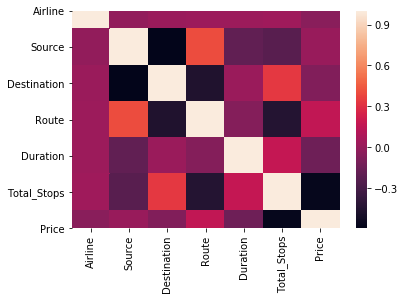

In [98]:
sns.heatmap(dfcor)  #heatmap representation of the co-relation

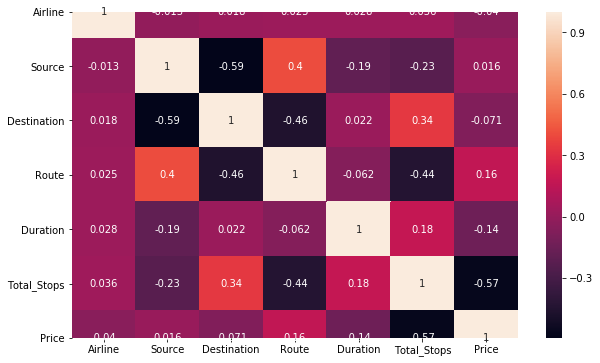

In [99]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,color='red',annot=True)

In [100]:
#finding the skewness of the dataset

df.skew()

Airline        0.731095
Source        -0.424054
Destination    1.244169
Route         -0.502066
Duration      -0.213427
Total_Stops    0.631681
Price          1.812552
dtype: float64

In [101]:
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])
    if df.skew().loc[i]<-0.55:
        df[i]=np.square(df[i])
        
df.skew()

Airline        0.376779
Source        -0.424054
Destination    0.283084
Route         -0.502066
Duration      -0.213427
Total_Stops    0.466484
Price         -0.254565
dtype: float64

In [102]:
#finding the outliers

from scipy.stats import zscore

z=abs(zscore(df))
print('df.shape:',df.shape)
df1=df.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

df.shape: (10683, 7)
df1.shape: (10674, 7)
z value is: [[0.38012106 1.65844074 1.89750389 ... 0.42287466 1.35393132 1.40419852]
 [1.39066176 0.89005213 1.30046893 ... 1.30672664 0.08817913 0.08788286]
 [0.0885509  0.04055451 0.06332417 ... 0.81083539 0.08817913 1.06937341]
 ...
 [0.0885509  1.65844074 0.66035913 ... 0.79114632 1.35393132 0.2011516 ]
 [2.30376292 1.65844074 1.89750389 ... 0.40446108 1.35393132 0.88809731]
 [1.39066176 0.04055451 0.06332417 ... 1.40800134 0.08817913 0.7451893 ]]


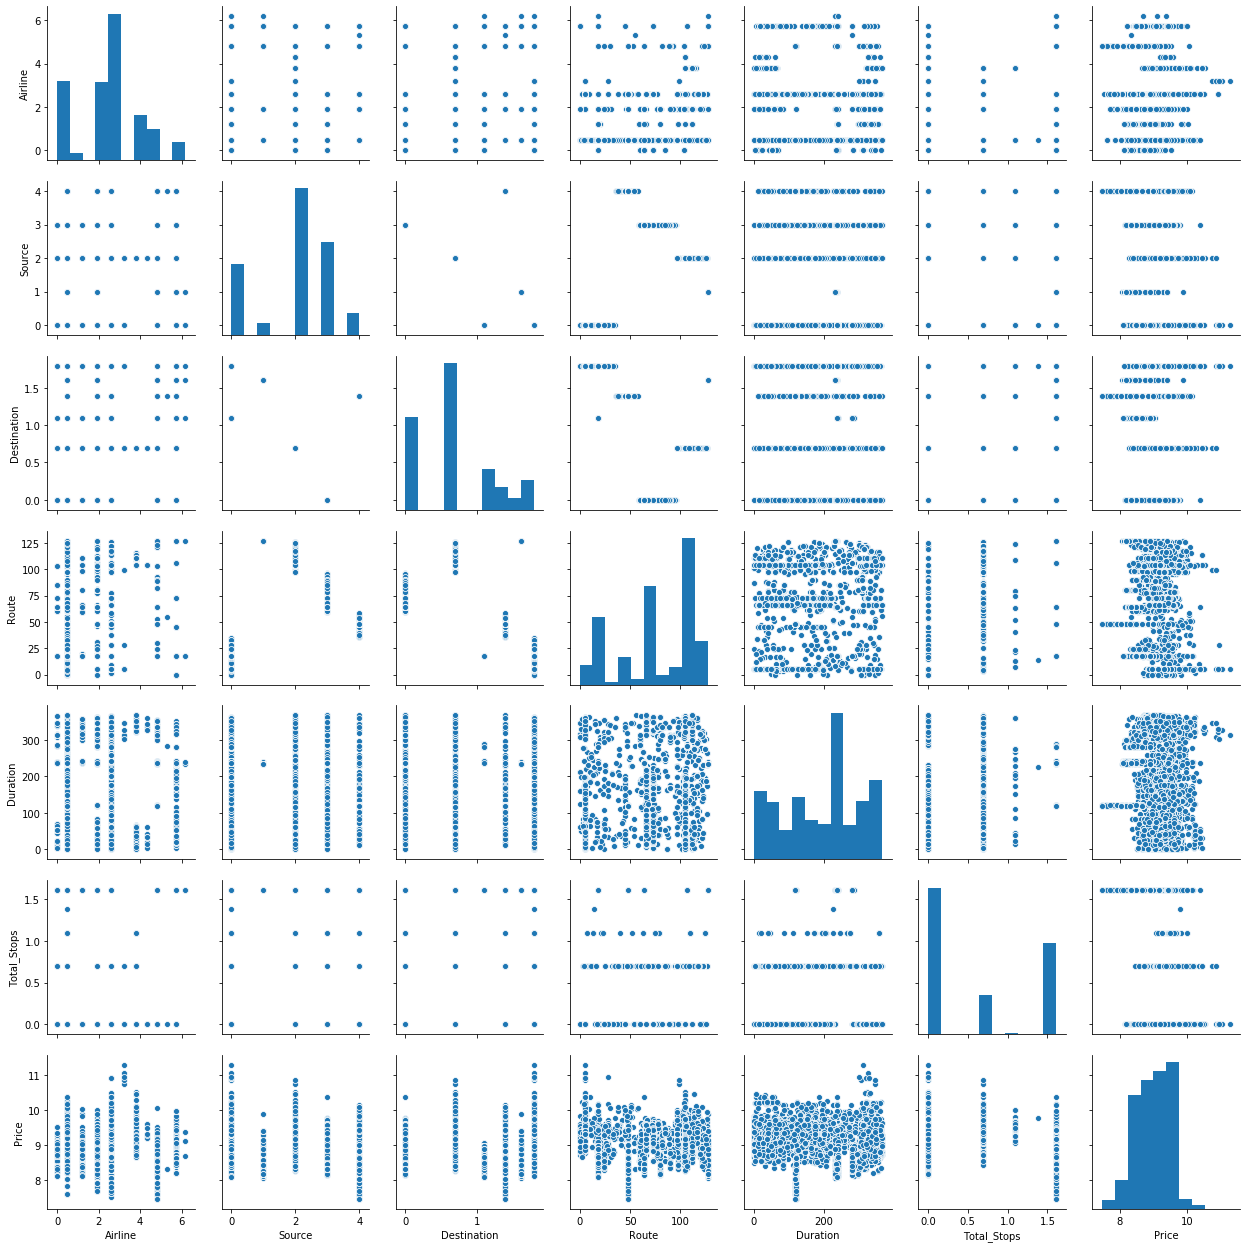

In [103]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(df)
plt.show()

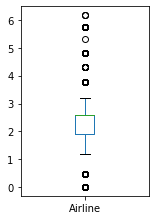

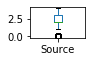

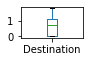

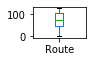

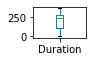

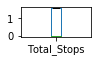

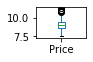

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

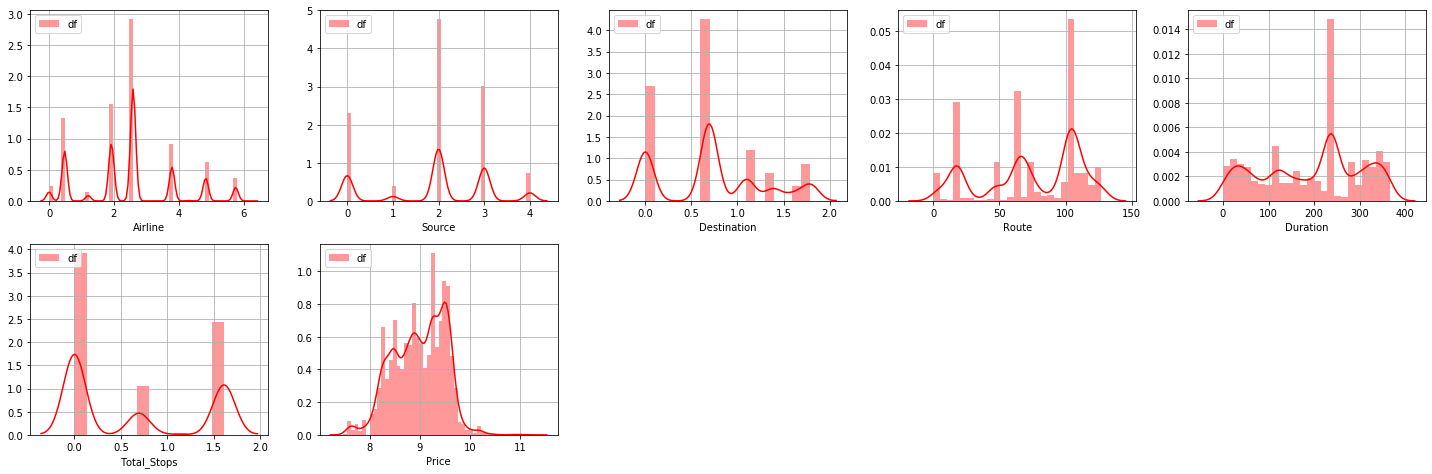

In [105]:
#Plotting Displot Through Iteratio
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df[col],color='r',kde=True,label='df')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

In [110]:
df.keys()

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price'],
      dtype='object')

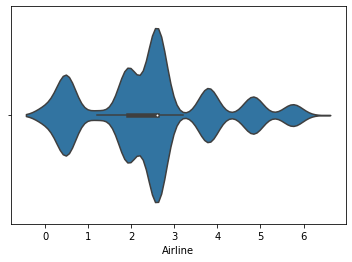

In [111]:
#violin plot representation with respect to each column

sns.violinplot(x="Airline",data=df)

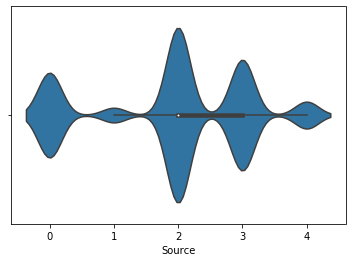

In [112]:
sns.violinplot(x="Source",data=df)

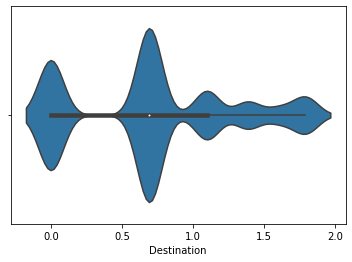

In [113]:
sns.violinplot(x="Destination",data=df)

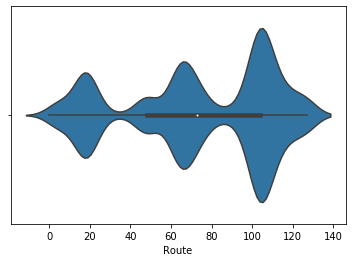

In [114]:
sns.violinplot(x="Route",data=df)

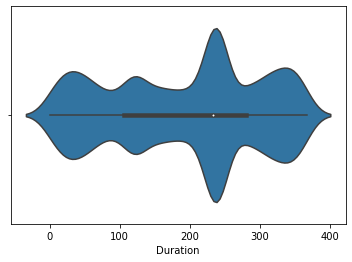

In [115]:
sns.violinplot(x="Duration",data=df)

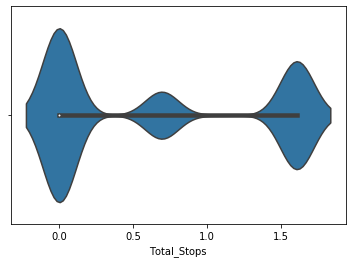

In [116]:
sns.violinplot(x="Total_Stops",data=df)

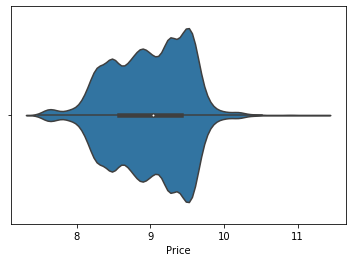

In [117]:
sns.violinplot(x="Price",data=df)

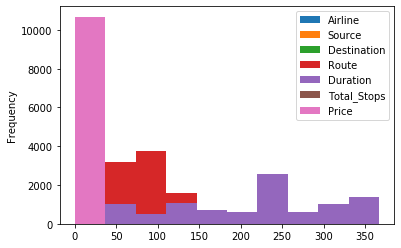

In [118]:
df.plot.hist()

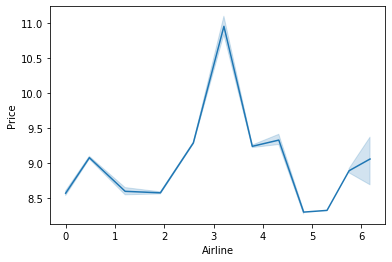

In [120]:
#Line plot representation
sns.lineplot(df["Airline"],df["Price"])
plt.show()

In [121]:
df.keys()

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price'],
      dtype='object')

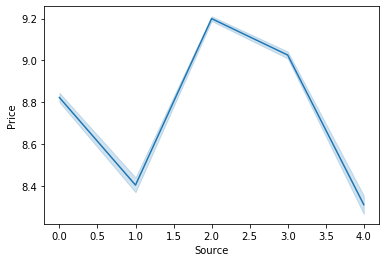

In [122]:
sns.lineplot(df["Source"],df["Price"])
plt.show()

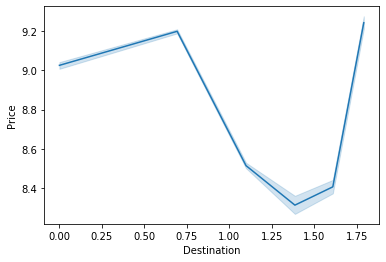

In [123]:
sns.lineplot(df["Destination"],df["Price"])
plt.show()

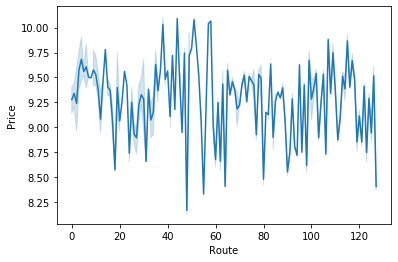

In [124]:
sns.lineplot(df["Route"],df["Price"])
plt.show()

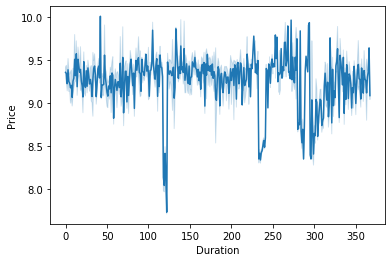

In [125]:
sns.lineplot(df["Duration"],df["Price"])
plt.show()

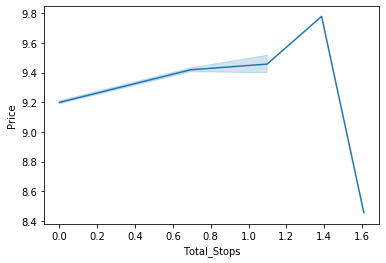

In [126]:
sns.lineplot(df["Total_Stops"],df["Price"])
plt.show()

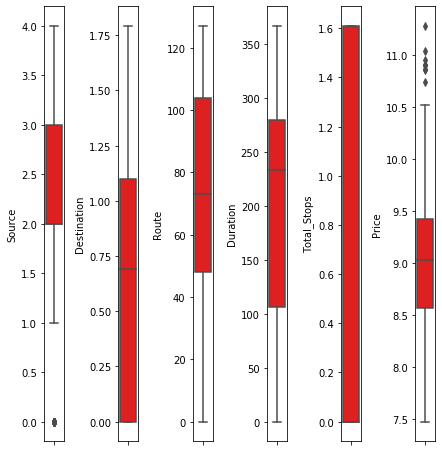

In [127]:
#column Plot
collist = df.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [128]:
df.keys()

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price'],
      dtype='object')

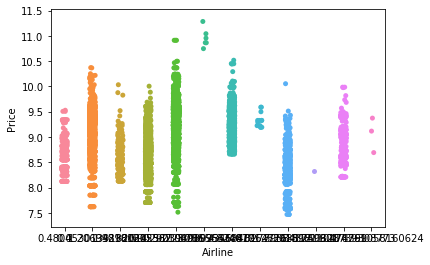

In [129]:
#strip plot representation

ax=sns.stripplot(x='Airline',y="Price",data=df);

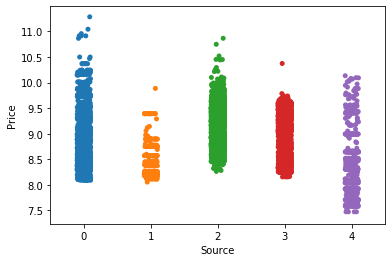

In [130]:
ax=sns.stripplot(x='Source',y="Price",data=df);

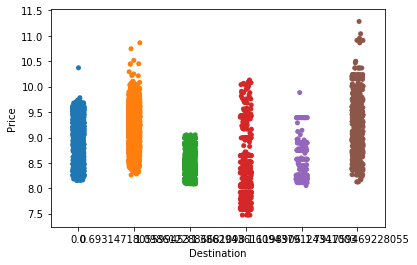

In [131]:
ax=sns.stripplot(x='Destination',y="Price",data=df);

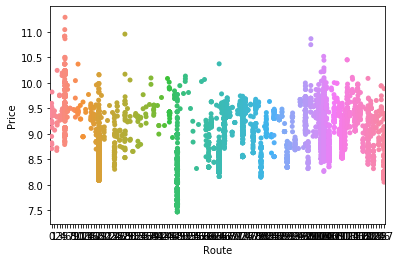

In [132]:
ax=sns.stripplot(x='Route',y="Price",data=df);

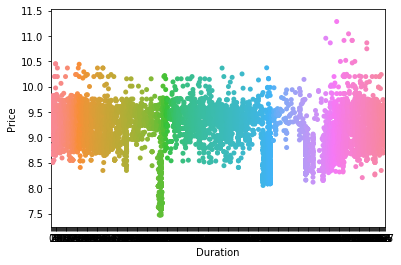

In [133]:
ax=sns.stripplot(x='Duration',y="Price",data=df);

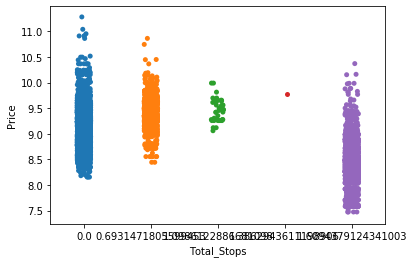

In [134]:
ax=sns.stripplot(x='Total_Stops',y="Price",data=df);

In [135]:
df.keys()

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price'],
      dtype='object')

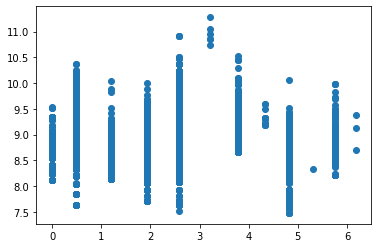

In [137]:
#using Scatter Plot
plt.scatter(df['Airline'],df['Price'])

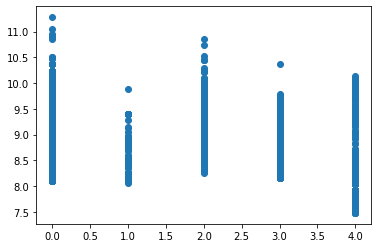

In [138]:
plt.scatter(df['Source'],df['Price'])

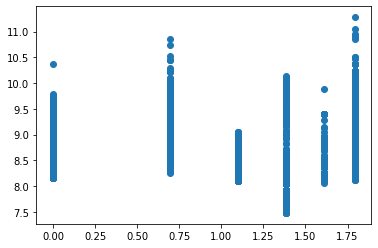

In [139]:
plt.scatter(df['Destination'],df['Price'])

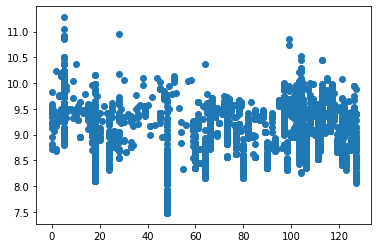

In [140]:
plt.scatter(df['Route'],df['Price'])

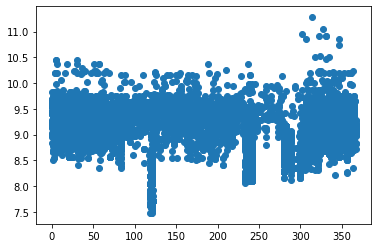

In [141]:
plt.scatter(df['Duration'],df['Price'])

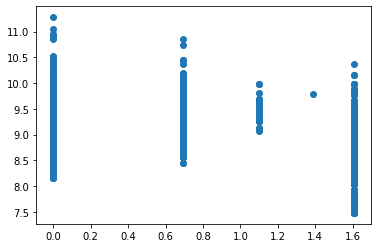

In [136]:
plt.scatter(df['Total_Stops'],df['Price'])

In [142]:
#Separating X and Y Variable to predict the dataset

X = df.drop("Price", axis=1)
X



,Airline,Source,Destination,Route,Duration,Total_Stops
0,1.921812,0,1.791759,18,240,1.609438
1,0.480453,3,0.000000,84,336,0.693147
2,2.590290,2,0.693147,118,106,0.693147
3,1.921812,3,0.000000,91,311,0.000000
4,1.921812,0,1.791759,29,303,0.000000
...,...,...,...,...,...,...
10678,0.000000,3,0.000000,64,236,1.609438
10679,0.480453,3,0.000000,64,237,1.609438
10680,2.590290,0,1.098612,18,280,1.609438
10681,5.749902,0,1.791759,18,238,1.609438


In [143]:
Y = df["Price"]
Y

0        8.268219
1        8.944159
2        9.538420
3        8.735364
4        9.495745
           ...   
10678    8.320692
10679    8.329899
10680    8.885994
10681    9.445333
10682    9.371949
Name: Price, Length: 10683, dtype: float64

In [144]:
X.shape

(10683, 6)

In [145]:
Y.shape

(10683,)

In [146]:
Y = Y.values.reshape(-1,1)
Y

array([[8.26821888],
       [8.94415883],
       [9.53842035],
       ...,
       [8.88599432],
       [9.44533344],
       [9.37194889]])

In [153]:
#splitting the data into training and testing

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.35,random_state=39)

In [154]:
train_X.shape

(6943, 6)

In [155]:
train_Y.shape

(6943, 1)

In [156]:
test_Y.shape

(3740, 1)

In [157]:
test_X.shape

(3740, 6)

In [158]:
#Applying the regression techinque
#Linear Regression

lg=LinearRegression()
lg.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
lg.coef_

array([[-0.02420722, -0.09431694, -0.09044311,  0.00068299, -0.00044633,
        -0.43475452]])

In [160]:
lg.intercept_

array([9.60643064])

In [161]:
pred=lg.predict(test_X)
print(pred)

[[9.14919106]
 [8.94893225]
 [8.57334352]
 ...
 [9.03055594]
 [9.32376292]
 [9.38715355]]


In [163]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result:",pred)
print("actual result",test_Y)

Predicted result: [[9.14919106]
 [8.94893225]
 [8.57334352]
 ...
 [9.03055594]
 [9.32376292]
 [9.38715355]]
actual result [[9.55951728]
 [8.99949588]
 [8.44870019]
 ...
 [9.21939922]
 [8.93840041]
 [9.58843428]]


In [164]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.3196199522823268
Mean sqaured error: 0.15268534196890474
Root mean squared error: 0.3907497178103968


In [165]:
#Boost through GradientBoostRegressor By using Parameters
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [166]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.7333828379658742
Mean squared error: 0.07
R2 Score: 0.75


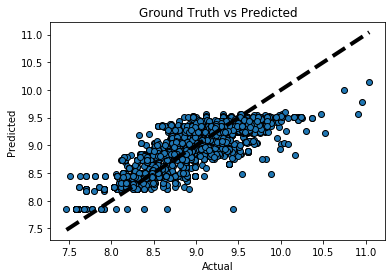

In [167]:
#visuvalize the pridicted value
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [168]:
#using Recurrsion
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [169]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [170]:
# Lets use LinearRegression and check the max r2 score with diff levels
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is 0.4123714919531628
r2 score corresponding to  43 is 0.42118331658675157
r2 score corresponding to  44 is 0.4046044685573257
r2 score corresponding to  45 is 0.4099452639929383
r2 score corresponding to  46 is 0.4563519375786468
r2 score corresponding to  47 is 0.4542044293598544
r2 score corresponding to  48 is 0.43629329625084
r2 score corresponding to  49 is 0.41127124390581804
r2 score corresponding to  50 is 0.4396968854700769
r2 score corresponding to  51 is 0.4361999120169352
r2 score corresponding to  52 is 0.41155334626676354
r2 score corresponding to  53 is 0.4193276805486609
r2 score corresponding to  54 is 0.4420631835721982
r2 score corresponding to  55 is 0.4316377768863523
r2 score corresponding to  56 is 0.4257829828860883
r2 score corresponding to  57 is 0.44117347577762667
r2 score corresponding to  58 is 0.4331403935601619
r2 score corresponding to  59 is 0.4149604891039115
r2 score corresponding to  60 is 0.43014323313912006
r2 score 

In [175]:
#Boosting Linear Regression
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=lreg,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6297921837278724
std deviation in r2 score for ada boosting Regression:  0.02860355350230677


In [171]:
#KNN Model to predict
from sklearn.neighbors import KNeighborsRegressor
knr1 = KNeighborsRegressor()
knr1.fit(train_X,train_Y)
knr1.score(train_X,train_Y)
predicted=knr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,predicted))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, predicted))

Mean squared error of linear svc: 0.07
R2 Score of linear svc: 0.75


In [172]:
#use grid_search to find optimal value of n_neighbors for KNN Modl
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,30)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X,Y)
gknr.best_params_

{'n_neighbors': 8}

In [173]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors=8)
r_state = maxr2_score(knr,X,Y)

r2 score corresponding to  42 is 0.6948112093786192
r2 score corresponding to  43 is 0.7535520999154339
r2 score corresponding to  44 is 0.7103312031464816
r2 score corresponding to  45 is 0.7370194672825708
r2 score corresponding to  46 is 0.7334609037919738
r2 score corresponding to  47 is 0.7335376166935476
r2 score corresponding to  48 is 0.7372957129399986
r2 score corresponding to  49 is 0.7458112770073164
r2 score corresponding to  50 is 0.7531664704425223
r2 score corresponding to  51 is 0.7305245188960056
r2 score corresponding to  52 is 0.7473666242763775
r2 score corresponding to  53 is 0.711191277847224
r2 score corresponding to  54 is 0.7420991199225843
r2 score corresponding to  55 is 0.7497792257998235
r2 score corresponding to  56 is 0.7304055947965611
r2 score corresponding to  57 is 0.7411583983189731
r2 score corresponding to  58 is 0.730465541847239
r2 score corresponding to  59 is 0.7169873088038149
r2 score corresponding to  60 is 0.7224285405347903
r2 score corre

In [174]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 scorefor Linear Regression:",cross_val_score(lreg,X,Y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for KNN Regression:",cross_val_score(knr,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression: 0.42996118764801244
std deviation in r2 scorefor Linear Regression: 0.018682720385313902

Mean r2 score for KNN Regression:  0.738520475486619
std deviation in r2 score for KNN Regression: 0.0133834934098247


In [176]:
#Boosting KNN model
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knr,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6346413867082472
std deviation in r2 score for ada boosting Regression:  0.022721338041509213


In [178]:
#check lasso regression and best value of alph
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=15)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.001}

In [179]:
#Lets use cross val score with Lasso
lasso_grs=Lasso(alpha = 0.001)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs,X,Y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.4299286213904662
std deviation in r2 score for Lasso Regression:  0.01851563492768596


In [181]:
#Boosting Lasso Regressor
from sklearn.ensemble import AdaBoostRegressor
ada3=AdaBoostRegressor()
add3=AdaBoostRegressor(base_estimator=lasso_grs,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada3,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada3,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6306091115024071
std deviation in r2 score for ada boosting Regression:  0.019126181275457295


In [182]:
#Support Vector Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svr1 = SVR(kernel = "rbf")
svr1.fit(train_X,train_Y)
svr1.score(train_X,train_Y)
y_pred1=svr1.predict(test_X)
print("Mean squared error of linear svc: %.2f"% mean_squared_error(test_Y,y_pred1))
print('R2 Score of linear svc: %.2f' % r2_score(test_Y, y_pred1))

Mean squared error of linear svc: 0.07
R2 Score of linear svc: 0.75


In [184]:
#Boosting Support Vector Machine
from sklearn.ensemble import AdaBoostRegressor
ada4=AdaBoostRegressor()
add4=AdaBoostRegressor(base_estimator=svr1,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada4,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(ada4,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.6246495315682754
std deviation in r2 score for ada boosting Regression:  0.020590941854872355


In [185]:
#Decision Tree Regressorr
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
  

dtregressor = DecisionTreeRegressor(random_state = 1)  
  
 
dtregressor.fit(X, Y) 

dtregressor.score(train_X,train_Y)
y4=dtregressor.predict(test_X)
print("Mean squared error of Decision Tree Regressor: %.2f"% mean_squared_error(test_Y,y4))
print('R2 Score : %.2f' % r2_score(test_Y, y4))

Mean squared error of Decision Tree Regressor: 0.05
R2 Score : 0.83


In [186]:
#predict the value
pred=dtregressor.predict(test_X)
print("Predicted result :",y4)
print("actual price",test_Y)

Predicted result : [9.40555707 9.42346372 8.47147004 ... 8.81722697 9.32649165 9.18902215]
actual price [[9.6011655 ]
 [9.59662266]
 [8.47741232]
 ...
 [8.83098151]
 [9.42335278]
 [8.8629083 ]]


In [187]:
#Boosting Decision Tree
from sklearn.ensemble import AdaBoostRegressor
reg5=AdaBoostRegressor()
reg5=AdaBoostRegressor(base_estimator=dtregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(reg5,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(reg5,X,Y,cv=5,scoring="r2").std())


Mean r2 score for ada boosting Regression:  0.7509000819189173
std deviation in r2 score for ada boosting Regression:  0.01043291587514722


In [190]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=5)
rfregressor.fit(train_X, train_Y)
y_p5 = rfregressor.predict(test_X)
print("Mean squared error of poly svc: %.2f"% mean_squared_error(test_Y,y_p5))
print('R2 Score : %.2f' % r2_score(test_Y, y_p5))

Mean squared error of poly svc: 0.06
R2 Score : 0.77


In [191]:
rf_gs = RandomForestRegressor(n_estimators=120)

In [192]:
n_features = X.shape[1]

In [193]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, Y)
print(grid.best_params_)

{'max_features': 5, 'max_depth': 12}


In [196]:
rf_gss = RandomForestRegressor(max_features = 6, max_depth = 10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").mean())
print("std deviation in r2 score for ada boosting Regression: ",cross_val_score(rf_gss,X,Y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.7723444023337881
std deviation in r2 score for ada boosting Regression:  0.009448004387304738


In [197]:
#all the models,dtregressor gives the Highest r2 score(0.83) and mean squared error is .05, so we can save this model

In [198]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 17_Airline_datatrain.csv')

In [199]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'AAirline_datatrain.pkl')

['AAirline_datatrain.pkl']

# Airline_Test Dataset

In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [206]:
data1 = pd.read_excel('Test_set1.xlsx')
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [207]:
#EDA Process

data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934


In [208]:
data1.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,27489


In [209]:
#the null values without using visualizatio
data1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [210]:
#the Testing Data into the same format like Training Datase
data1.drop('Date_of_Journey',axis=1,inplace=True)
data1.drop('Dep_Time',axis=1,inplace=True)
data1.drop('Arrival_Time',axis=1,inplace=True)
data1.drop('Additional_Info',axis=1,inplace=True)
data1

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,15998
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,16612
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,25572
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,25778
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,16934
...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,14046
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,14086
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,22720
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,23544


In [211]:
# converting the attributes to numberic format
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [213]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in data1.columns:
    if(len(data1[cols].value_counts()) ==5):
        le_anima = preprocessing.LabelEncoder()
        data1[cols] = le_anima.fit_transform(data1[cols])
        
#For all those columns who has 6 attributes
from sklearn import preprocessing
for cols in data1.columns:
    if(len(data1[cols].value_counts()) ==6):
        le_anima = preprocessing.LabelEncoder()
        data1[cols] = le_anima.fit_transform(data1[cols])

In [214]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,Jet Airways,2,1,DEL → BOM → COK,10h 55m,0,15998
1,IndiGo,3,0,CCU → MAA → BLR,4h,0,16612
2,Jet Airways,2,1,DEL → BOM → COK,23h 45m,0,25572
3,Multiple carriers,2,1,DEL → BOM → COK,13h,0,25778
4,Air Asia,0,2,BLR → DEL,2h 50m,4,16934
...,...,...,...,...,...,...,...
2666,Air India,3,0,CCU → DEL → BLR,23h 55m,0,14046
2667,IndiGo,3,0,CCU → BLR,2h 35m,4,14086
2668,Jet Airways,2,1,DEL → BOM → COK,6h 35m,0,22720
2669,Air India,2,1,DEL → BOM → COK,15h 15m,0,23544


In [215]:
data1['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [216]:
#For all those columns who has 11 attributes
from sklearn import preprocessing
for cols in data1.columns:
    if(len(data1[cols].value_counts()) ==11):
        le_anima = preprocessing.LabelEncoder()
        data1[cols] = le_anima.fit_transform(data1[cols])

In [217]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,4,2,1,DEL → BOM → COK,10h 55m,0,15998
1,3,3,0,CCU → MAA → BLR,4h,0,16612
2,4,2,1,DEL → BOM → COK,23h 45m,0,25572
3,6,2,1,DEL → BOM → COK,13h,0,25778
4,0,0,2,BLR → DEL,2h 50m,4,16934
...,...,...,...,...,...,...,...
2666,1,3,0,CCU → DEL → BLR,23h 55m,0,14046
2667,3,3,0,CCU → BLR,2h 35m,4,14086
2668,4,2,1,DEL → BOM → COK,6h 35m,0,22720
2669,1,2,1,DEL → BOM → COK,15h 15m,0,23544


In [218]:
data1['Route'].unique()

array(['DEL → BOM → COK', 'CCU → MAA → BLR', 'BLR → DEL',
       'BLR → TRV → DEL', 'CCU → HYD → BLR', 'CCU → BLR',
       'CCU → BOM → BLR', 'DEL → MAA → BOM → COK', 'DEL → HYD → COK',
       'BLR → BOM → DEL', 'CCU → DEL → BLR', 'DEL → JAI → BOM → COK',
       'DEL → BHO → BOM → COK', 'BOM → HYD', 'CCU → PNQ → BLR',
       'MAA → CCU', 'CCU → BOM → COK → BLR', 'DEL → BLR → COK',
       'DEL → HYD → MAA → COK', 'DEL → MAA → COK',
       'CCU → IXR → BBI → BOM → BLR', 'CCU → DEL → AMD → BLR',
       'DEL → COK', 'CCU → JAI → BOM → BLR', 'DEL → LKO → COK',
       'CCU → IXB → BLR', 'DEL → CCU → BOM → COK',
       'CCU → GAU → DEL → BLR', 'BLR → COK → DEL',
       'BLR → BOM → NAG → DEL', 'CCU → BBI → BOM → BLR',
       'BLR → AMD → DEL', 'BOM → DEL → HYD', 'DEL → GOI → BOM → COK',
       'DEL → IXU → BOM → COK', 'DEL → HYD → BOM → COK',
       'CCU → DEL → COK → BLR', 'BLR → GOI → DEL',
       'BLR → BOM → BHO → DEL', 'DEL → IDR → BOM → COK',
       'DEL → AMD → BOM → COK', 'DEL → RPR →

In [219]:
array = data1['Route']

array.shapearray = data1['Route']

array.shape

(2671,)

In [220]:
le=LabelEncoder()
data2=le.fit_transform(data1['Route'])
data2

array([76, 65, 76, ..., 76, 76, 76])

In [221]:
data1['Route']=data2

In [223]:
data1['Route'].unique()

array([76, 65, 16, 24, 57, 43, 45, 92, 83,  5, 51, 88, 74, 33, 68, 99, 46,
       75, 84, 93, 60, 50, 78, 62, 91, 58, 77, 56, 15, 10, 40,  0, 30, 80,
       87, 82, 52, 18,  4, 85, 70, 96, 94, 67, 20,  8,  6, 69, 39, 21, 61,
       47, 72, 25, 73, 19,  3, 79, 71, 48, 23, 64, 97, 14, 98, 29, 44, 89,
       95, 81,  7,  2, 36, 55, 11,  1, 37, 54, 90, 63, 66, 35, 13, 27, 49,
       31, 34, 53, 17,  9, 86, 41, 26, 22, 38, 28, 12, 42, 59, 32],
      dtype=int64)

In [224]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,4,2,1,76,10h 55m,0,15998
1,3,3,0,65,4h,0,16612
2,4,2,1,76,23h 45m,0,25572
3,6,2,1,76,13h,0,25778
4,0,0,2,16,2h 50m,4,16934
...,...,...,...,...,...,...,...
2666,1,3,0,51,23h 55m,0,14046
2667,3,3,0,43,2h 35m,4,14086
2668,4,2,1,76,6h 35m,0,22720
2669,1,2,1,76,15h 15m,0,23544


In [225]:
#convert the Duration column into Numeric
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [226]:
array = data1['Duration']

array.shapearray = data1['Duration']

array.shape

(2671,)

In [227]:
le=LabelEncoder()
data2=le.fit_transform(data1['Duration'])
data2

array([ 10, 248, 148, ..., 278,  60,  49])

In [228]:
data1['Duration']=data2

In [229]:
data1

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
0,4,2,1,76,10,0,15998
1,3,3,0,65,248,0,16612
2,4,2,1,76,148,0,25572
3,6,2,1,76,36,0,25778
4,0,0,2,16,216,4,16934
...,...,...,...,...,...,...,...
2666,1,3,0,51,150,0,14046
2667,3,3,0,43,213,4,14086
2668,4,2,1,76,278,0,22720
2669,1,2,1,76,60,0,23544


In [230]:
data1.dtypes

Airline        int32
Source         int64
Destination    int32
Route          int32
Duration       int32
Total_Stops    int64
Price          int64
dtype: object

In [231]:
data1.shape

(2671, 7)

In [233]:
data1.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,3.972669,1.961438,1.432797,54.356421,169.453014,1.422688,20159.514414
std,2.295657,1.184328,1.467971,27.128993,93.907162,1.795728,5005.399225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10138.000000
25%,3.000000,2.000000,0.000000,33.000000,91.000000,0.000000,16469.500000
50%,4.000000,2.000000,1.000000,51.000000,209.000000,0.000000,19582.000000
75%,6.000000,3.000000,2.000000,76.000000,241.000000,4.000000,23476.500000
max,10.000000,4.000000,5.000000,99.000000,319.000000,4.000000,64881.000000


In [234]:
#Finding the corelation
dfcor=data1.corr()
dfcor

,Airline,Source,Destination,Route,Duration,Total_Stops,Price
Airline,1.000000,-0.031107,0.033630,0.023995,0.027559,0.039236,-0.006624
Source,-0.031107,1.000000,-0.578296,0.339434,-0.169256,-0.212995,0.031836
Destination,0.033630,-0.578296,1.000000,-0.444760,-0.007661,0.331240,-0.011972
Route,0.023995,0.339434,-0.444760,1.000000,-0.053478,-0.441772,0.000935
Duration,0.027559,-0.169256,-0.007661,-0.053478,1.000000,0.197855,-0.011453
Total_Stops,0.039236,-0.212995,0.331240,-0.441772,0.197855,1.000000,-0.036075
Price,-0.006624,0.031836,-0.011972,0.000935,-0.011453,-0.036075,1.000000


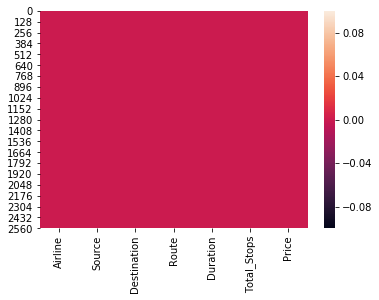

In [237]:
sns.heatmap(data1.isnull())

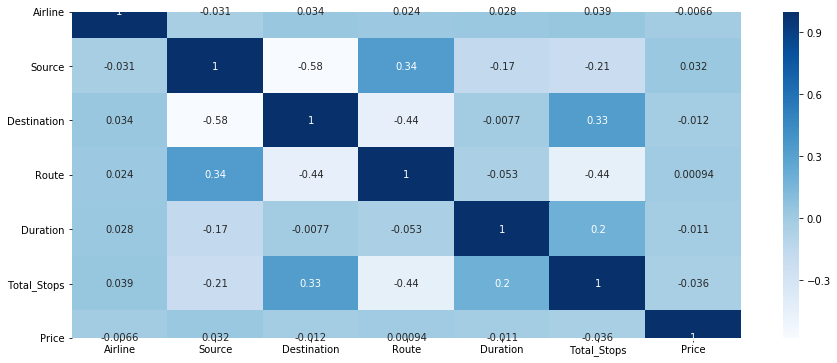

In [242]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [244]:
#finding the skewness of the dataset

data1.skew()

Airline        0.483882
Source        -0.424997
Destination    1.263630
Route         -0.281807
Duration      -0.275404
Total_Stops    0.672623
Price          1.269201
dtype: float64

In [245]:
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value.

#removing the skewness of the dataset using the log

for i in data1.columns:
    if data1.skew().loc[i]>0.55:
        data1[i]=np.log1p(data1[i])
    if data1.skew().loc[i]<-0.55:
        data1[i]=np.square(data1[i])
        
data1.skew()

Airline        0.483882
Source        -0.424997
Destination    0.283171
Route         -0.281807
Duration      -0.275404
Total_Stops    0.504977
Price          0.139538
dtype: float64

In [246]:
#finding/remove the outliers

from scipy.stats import zscore

z=abs(zscore(data1))
print('data1.shape:',data1.shape)
df1=data1.loc[(z<3).all(axis=1)]
print('df1.shape:',df1.shape)
print("z value is:",z)

data1.shape: (2671, 7)
df1.shape: (2660, 7)
z value is: [[0.01190758 0.03256662 0.0641726  ... 1.69830361 0.85361513 0.84784553]
 [0.42377921 0.87708559 1.30805152 ... 0.83658895 0.85361513 0.69006154]
 [0.01190758 0.03256662 0.0641726  ... 0.22849195 0.85361513 1.11720446]
 ...
 [0.01190758 0.03256662 0.0641726  ... 1.15611322 0.85361513 0.62177406]
 [1.29515278 0.03256662 0.0641726  ... 1.16576315 0.85361513 0.77103008]
 [0.88328115 0.03256662 0.0641726  ... 1.28292205 0.85361513 1.42006314]]


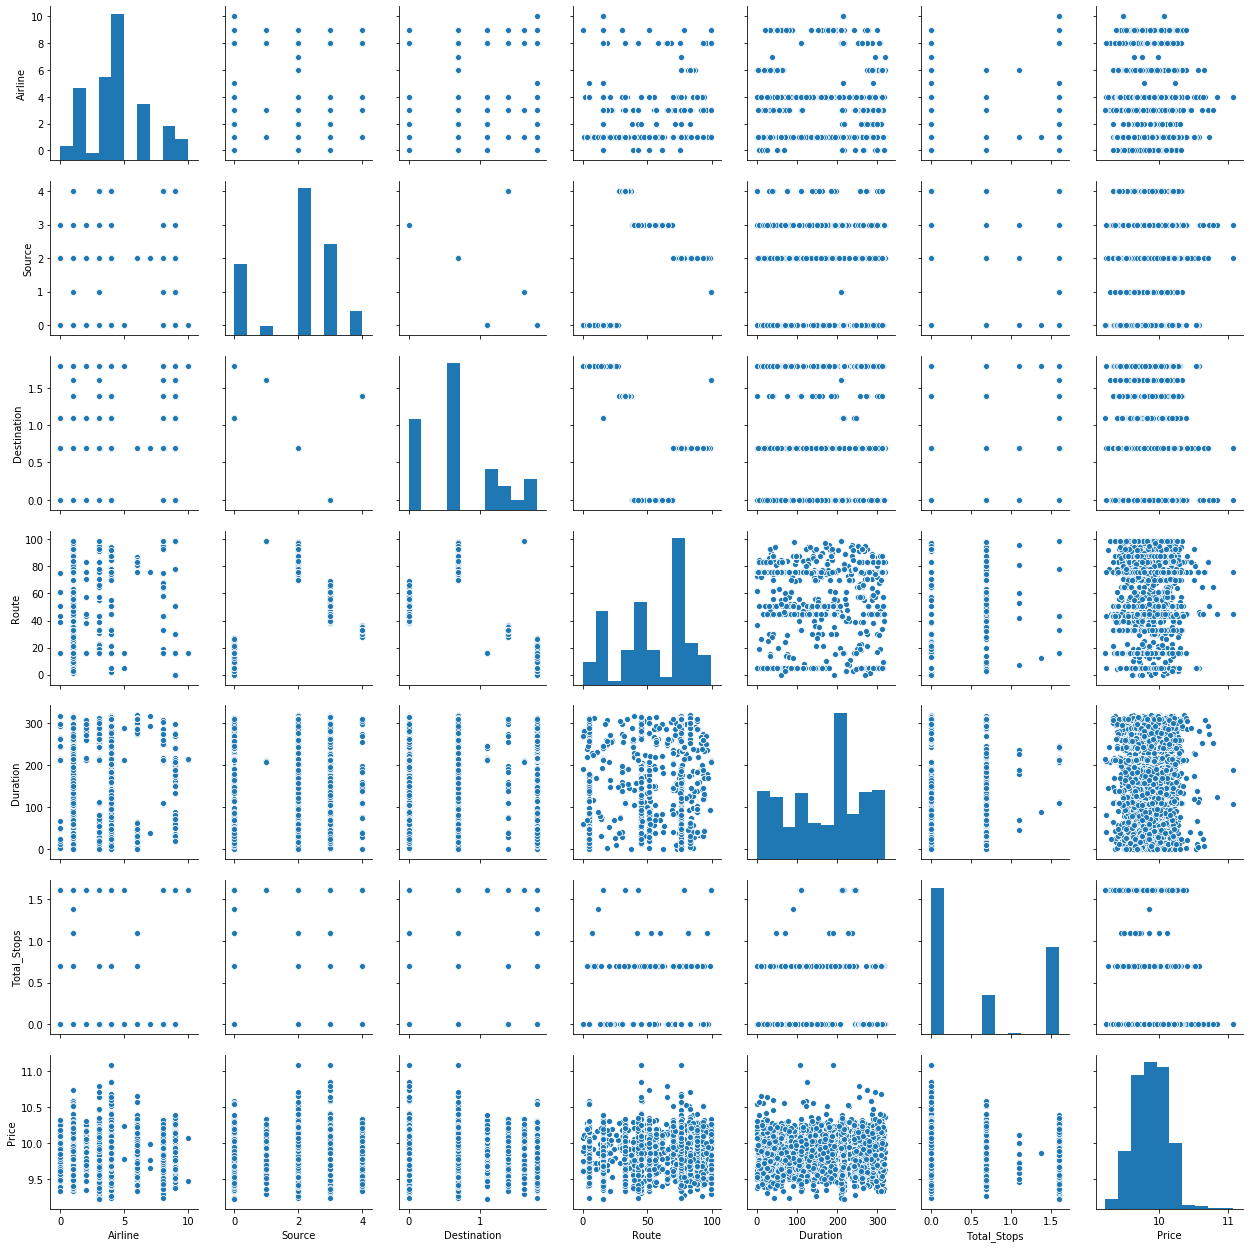

In [247]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data1)
plt.show()

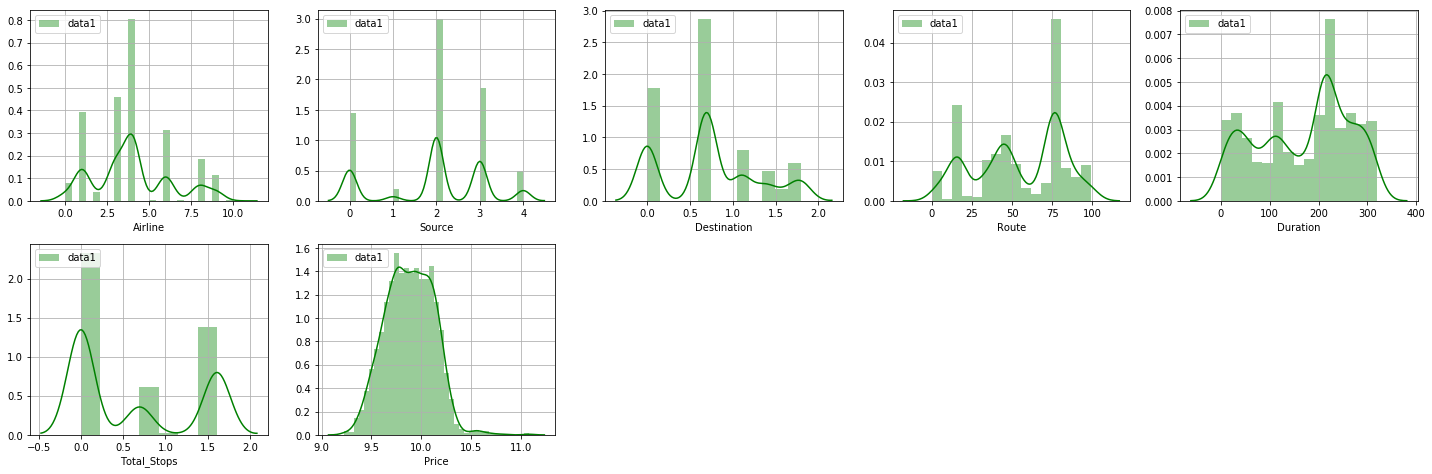

In [248]:
#Distiplot

plt.figure(figsize=(20,16))
for i,col in enumerate(list(data1.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data1[col],color='g',kde=True,label='data1')
    plt.grid()
    plt.legend(loc='upper left')
    plt.tight_layout()

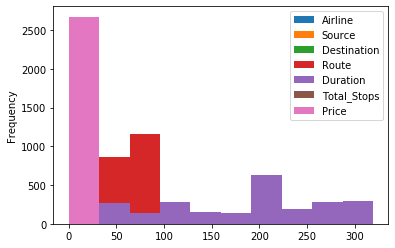

In [249]:
data1.plot.hist()

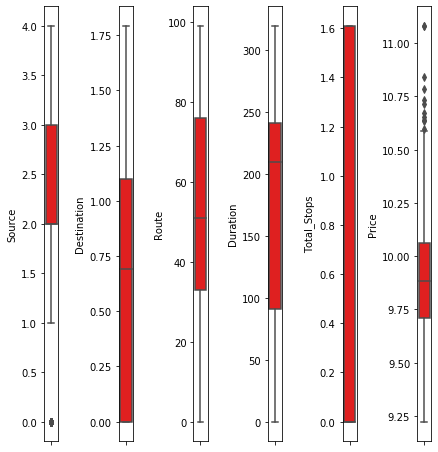

In [250]:
#column Plot
collist = data1.columns.values
ncols=15
nrows=12
plt.figure(figsize=(ncols,5*ncols))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.boxplot(data1[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [251]:
data1.keys()

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Price'],
      dtype='object')

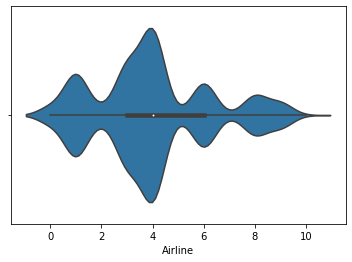

In [252]:
#violin plot representation with respect to each column

sns.violinplot(x="Airline",data=data1)

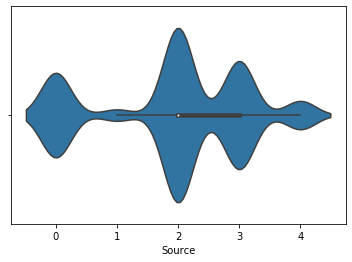

In [254]:
sns.violinplot(x="Source",data=data1)

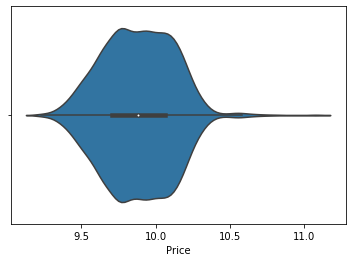

In [253]:
sns.violinplot(x="Price",data=data1)

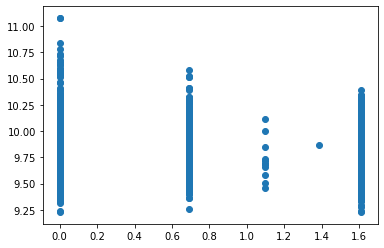

In [256]:
plt.scatter(data1['Total_Stops'],data1['Price'])

In [259]:
#Separating X and Y Variable to predict the dataset

X = data1.drop("Price", axis=1)
X

,Airline,Source,Destination,Route,Duration,Total_Stops
0,4,2,0.693147,76,10,0.000000
1,3,3,0.000000,65,248,0.000000
2,4,2,0.693147,76,148,0.000000
3,6,2,0.693147,76,36,0.000000
4,0,0,1.098612,16,216,1.609438
...,...,...,...,...,...,...
2666,1,3,0.000000,51,150,0.000000
2667,3,3,0.000000,43,213,1.609438
2668,4,2,0.693147,76,278,0.000000
2669,1,2,0.693147,76,60,0.000000


In [260]:
Y = data1["Price"]
Y

0        9.680281
1        9.717941
2       10.149292
3       10.157315
4        9.737138
          ...    
2666     9.550164
2667     9.553008
2668    10.031045
2669    10.066669
2670    10.221578
Name: Price, Length: 2671, dtype: float64

In [261]:
X.shape

(2671, 6)

In [262]:
Y.shape

(2671,)

In [263]:
Y = Y.values.reshape(-1,1)
Y

array([[ 9.6802815 ],
       [ 9.7179408 ],
       [10.14929239],
       ...,
       [10.03104489],
       [10.06666876],
       [10.22157758]])

In [264]:
#finding the test shape,train shape
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.33,random_state=39)

In [265]:
train_X.shape

(1789, 6)

In [266]:
train_Y.shape

(1789, 1)

In [267]:
test_X.shape

(882, 6)

In [268]:
test_Y.shape

(882, 1)

In [283]:
lg = LinearRegression()
lg.fit(train_X,train_Y)
lg.score(train_X,train_Y)

0.004943716544815624

In [281]:
lg.coef_

array([[ 7.57794485e-04,  1.15940368e-02,  4.96631032e-03,
        -1.07557087e-04,  1.62035609e-05, -1.65662063e-02]])

In [282]:
lg.intercept_

array([9.86889198])

In [284]:
#predict the value
pred=lg.predict(test_X)
print("Predicted result price:",pred)
print("actual price",test_Y)

Predicted result price: [[9.8967548 ]
 [9.89852895]
 [9.87985807]
 [9.88865935]
 [9.9027888 ]
 [9.89331212]
 [9.90212446]
 [9.89260782]
 [9.90264297]
 [9.89307661]
 [9.9036962 ]
 [9.88882919]
 [9.89222648]
 [9.90269438]
 [9.89122595]
 [9.85519678]
 [9.88085093]
 [9.89601321]
 [9.9046198 ]
 [9.88049445]
 [9.89545017]
 [9.88974357]
 [9.8494648 ]
 [9.89197588]
 [9.88135324]
 [9.88276295]
 [9.9064022 ]
 [9.89657769]
 [9.88268193]
 [9.90249714]
 [9.90307197]
 [9.86063366]
 [9.89265643]
 [9.92895464]
 [9.89601321]
 [9.89507831]
 [9.8781116 ]
 [9.89197588]
 [9.89657769]
 [9.90619155]
 [9.86061745]
 [9.89164315]
 [9.89980218]
 [9.87659601]
 [9.85173819]
 [9.896771  ]
 [9.89506211]
 [9.89444901]
 [9.9023027 ]
 [9.87997009]
 [9.89980218]
 [9.8502064 ]
 [9.87809539]
 [9.89101122]
 [9.90397166]
 [9.90580154]
 [9.86521457]
 [9.90693691]
 [9.85686089]
 [9.88264508]
 [9.90813235]
 [9.90404585]
 [9.90396483]
 [9.88107778]
 [9.8820711 ]
 [9.89405539]
 [9.89195968]
 [9.86521457]
 [9.87809539]
 [9.883891

In [285]:
print('error:')

print('Mean absolute error:',mean_absolute_error(test_Y,pred))
print('Mean sqaured error:',mean_squared_error(test_Y,pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(test_Y,pred)))

error:
Mean absolute error: 0.1980871750160247
Mean sqaured error: 0.05739544016237945
Root mean squared error: 0.23957345462796886


In [286]:
#Boost through GradientBoostRegressor By using Parameter
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [287]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)


y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.10564533825909217
Mean squared error: 0.06
R2 Score: -0.03


In [289]:
#Linear Regression using Recursion

from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,random_state=55,test_size=0.20)

In [290]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42,100):
        train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.20,random_state=r_state)
        regr.fit(train_X,train_Y)
        y_pred = regr.predict(test_X)
        r2_scr=r2_score(test_Y,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state

In [291]:
#Lets use LinearRegression and check the max r2 score corresponding to different state
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
r_state = maxr2_score(lreg,X,Y)

r2 score corresponding to  42 is -3.084351607918201e-05
r2 score corresponding to  43 is -0.0036833158299458546
r2 score corresponding to  44 is -0.008127272669025576
r2 score corresponding to  45 is 0.001908705276096656
r2 score corresponding to  46 is -0.005309437533728589
r2 score corresponding to  47 is -0.0008454326958886593
r2 score corresponding to  48 is -0.0009116390917722761
r2 score corresponding to  49 is -0.0004987176475503841
r2 score corresponding to  50 is -0.000304053752044231
r2 score corresponding to  51 is 0.00197512594791871
r2 score corresponding to  52 is -0.00010117373646689742
r2 score corresponding to  53 is -0.010483556973757135
r2 score corresponding to  54 is -0.009064528969021657
r2 score corresponding to  55 is -0.007292461879452983
r2 score corresponding to  56 is -0.010164452025980708
r2 score corresponding to  57 is 0.0015900579307099871
r2 score corresponding to  58 is 0.0003449647030282499
r2 score corresponding to  59 is 0.001271330992330566
r2 scor

In [304]:
#Load Test Dataset into dtregressor Model

train_X = data1
y4=dtregressor.predict(test_X)
y4

array([ 9.96059274, 10.21790851,  9.70891184, 10.11279743,  9.79673137,
        9.79683031,  9.89374245,  9.74525885,  9.82635862,  9.94929228,
        9.77688119,  9.77937115,  9.8870808 ,  9.8679725 ,  9.81909935,
        9.83834804,  9.84734321,  9.8933034 ,  9.83077285,  9.88659336,
        9.88659336,  9.85172046,  9.84734094,  9.82635862,  9.90457249,
        9.97944021,  9.70891184,  9.89374245,  9.77297511,  9.84734321,
        9.6669421 ,  9.95708459, 10.03847939,  9.89697606,  9.79867686,
        9.8933034 ,  9.80258396,  9.99524424,  9.78332462,  9.76273413,
        9.88659336, 10.01485691,  9.79867686,  9.54144106,  9.9362203 ,
        9.52595371,  9.79791972,  9.95183546,  9.99740622, 10.28667297,
        9.51988178,  9.80605858,  9.84734321, 10.0257734 ,  9.87175863,
        9.85114107,  9.81354173,  9.77173129,  9.92453181,  9.97421732,
        9.92697755,  9.77987211,  9.97605668,  9.8207538 , 10.03536808,
        9.76797941,  9.64212279,  9.94163227, 10.00334769, 10.02

In [305]:
#Compare the Predicted Result with Actual Price of Testing DataSet Using dtregressor Model

#predict the value
pred1=dtregressor.predict(test_X)
print("Predicted result price:",pred1)
print("actual price",test_Y)

Predicted result price: [ 9.96059274 10.21790851  9.70891184 10.11279743  9.79673137  9.79683031
  9.89374245  9.74525885  9.82635862  9.94929228  9.77688119  9.77937115
  9.8870808   9.8679725   9.81909935  9.83834804  9.84734321  9.8933034
  9.83077285  9.88659336  9.88659336  9.85172046  9.84734094  9.82635862
  9.90457249  9.97944021  9.70891184  9.89374245  9.77297511  9.84734321
  9.6669421   9.95708459 10.03847939  9.89697606  9.79867686  9.8933034
  9.80258396  9.99524424  9.78332462  9.76273413  9.88659336 10.01485691
  9.79867686  9.54144106  9.9362203   9.52595371  9.79791972  9.95183546
  9.99740622 10.28667297  9.51988178  9.80605858  9.84734321 10.0257734
  9.87175863  9.85114107  9.81354173  9.77173129  9.92453181  9.97421732
  9.92697755  9.77987211  9.97605668  9.8207538  10.03536808  9.76797941
  9.64212279  9.94163227 10.00334769 10.02537785  9.89729212  9.65258284
  9.74525885  9.81998279  9.91997893  9.76597955  9.81457527  9.67398429
  9.8679725   9.9959693   9.88

In [307]:
# saving the predection to a csv file.
prediction = pd.DataFrame(pred, columns=['prediction']).to_csv('Project 17_Airline_datatest.csv')

In [308]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtregressor,'AAirline_datatest.pkl')

['AAirline_datatest.pkl']